In [1]:
%run ML.libaryPackage-1.0.0.ipynb

Using TensorFlow backend.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
import warnings
from sklearn.metrics import roc_curve
#from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score, StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from imblearn.under_sampling import *
from sklearn.decomposition import PCA
from imblearn.combine import SMOTETomek
from lightgbm import LGBMClassifier
from sklearn.preprocessing import PolynomialFeatures

warnings.filterwarnings('ignore')
%matplotlib inline

## data checking ##

In [3]:
# train data checking
train_data = pd.read_csv('./data/train.csv', encoding='CP949')
train_data

custid  gender     총구매액  구매건수  평균구매가격  평균할부개월수  구매브랜드종류  내점일수  \
0         18       0   680100    15   45340      1.7        9    10   
1         21       0   353450     9   39272      1.2        6     8   
2         23       0  5671400    36  157539      2.8       22    16   
3         26       0  1964000    28   70143      1.4       15    14   
4         35       0   885000     5  177000      6.0        5     2   
...      ...     ...      ...   ...     ...      ...      ...   ...   
4995   49952       1  6666517    93   71683      1.8       27    39   
4996   49954       0  3112100    17  183065      3.6       10    13   
4997   49957       1  5852482    37  158175      2.6       14    21   
4998   49975       1   654498    13   50346      2.5       10     7   
4999   49993       1  2554723    32   79835      1.7        9    26   

      수입상품_구매비율  주말방문비율  가을_구매건수  겨울_구매건수  봄_구매건수  여름_구매건수  아침_구매건수  저녁_구매건수  \
0          26.7   100.0      NaN      9.0     6.0      NaN      NaN      6.0   
1          11.1    37.5      NaN      5.0     4.0      NaN      3.0      NaN   
2           5.6    37.5      7.0     17.0    12.0      NaN     10.0     11.0   
3          39.3    28.6      5.0      8.0    15.0      NaN      NaN     18.0   
4           0.0   100.0      NaN      NaN     5.0      NaN      NaN      5.0   
...         ...     ...      ...      ...     ...      ...      ...      ...   
4995       10.8    43.6     13.0     33.0    14.0     33.0      8.0     41.0   
4996       29.4    38.5      4.0      6.0     6.0      1.0      3.0      NaN   
4997       40.5    19.0     12.0      6.0     6.0     13.0     16.0      NaN   
4998        7.7    14.3      6.0      4.0     2.0      1.0      NaN      2.0   
4999       21.9    34.6      6.0      5.0    10.0     11.0      8.0      5.0   

      점심_구매건수    주구매코너  
0         9.0      화장품  
1         6.0     영캐주얼  
2        15.0      장신구  
3        10.0      화장품  
4         NaN      피혁A  
...       ...      ...  
4995     44.0     일반식품  
4996     14.0  디자이너부띠끄  
4997     21.0      화장품  
4998     11.0      피혁A  
4999     19.0     일반식품  

[5000 rows x 18 columns]

In [4]:
# 예측할 new data 확인
test_data = pd.read_csv('./data/test.csv', encoding='CP949')
test_data

custid     총구매액  구매건수  평균구매가격  평균할부개월수  구매브랜드종류  내점일수  수입상품_구매비율  \
0     100001  3439000    25  137560      2.2       19    16       12.0   
1     100002  2073090    39   53156      1.3       18    29        0.0   
2     100003  1303800    22   59264      1.8       14    12        0.0   
3     100004  6696522    46  145577      1.7       31    22       37.0   
4     100005  1297640    26   49909      2.3       13     9       11.5   
...      ...      ...   ...     ...      ...      ...   ...        ...   
4995  104996   670690     5  134138      1.4        5     4        0.0   
4996  104997   628700    13   48362      1.8       10     7        7.7   
4997  104998   960923    12   80077      1.8        7     7        0.0   
4998  104999   786600    14   56186      1.7       12     9       14.3   
4999  105000  2568073    76   33790      1.6       23    35       10.5   

      주말방문비율  가을_구매건수  겨울_구매건수  봄_구매건수  여름_구매건수  아침_구매건수  저녁_구매건수  점심_구매건수  \
0       31.2      5.0      4.0     7.0      9.0     13.0      1.0     11.0   
1       20.7     13.0      8.0    10.0      8.0      4.0     10.0     25.0   
2       41.7      6.0      7.0     3.0      6.0      3.0      1.0     18.0   
3       50.0      5.0     15.0     9.0     17.0      NaN      4.0     42.0   
4       22.2     18.0      NaN     5.0      3.0      NaN      NaN     26.0   
...      ...      ...      ...     ...      ...      ...      ...      ...   
4995    75.0      1.0      2.0     2.0      NaN      1.0      1.0      3.0   
4996    42.9      NaN      5.0     1.0      7.0      NaN      3.0     10.0   
4997    42.9      4.0      1.0     6.0      1.0      NaN      NaN     12.0   
4998    55.6      NaN      7.0     4.0      3.0      2.0      4.0      8.0   
4999    22.9     23.0     20.0     9.0     24.0     11.0      4.0     61.0   

     주구매코너  
0      장신구  
1     유아동복  
2     유아동복  
3     수입명품  
4      스포츠  
...    ...  
4995  일반식품  
4996  조리욕실  
4997  일반식품  
4998   화장품  
4999  일반식품  

[5000 rows x 17 columns]

In [5]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   custid     5000 non-null   int64  
 1   gender     5000 non-null   int64  
 2   총구매액       5000 non-null   int64  
 3   구매건수       5000 non-null   int64  
 4   평균구매가격     5000 non-null   int64  
 5   평균할부개월수    5000 non-null   float64
 6   구매브랜드종류    5000 non-null   int64  
 7   내점일수       5000 non-null   int64  
 8   수입상품_구매비율  5000 non-null   float64
 9   주말방문비율     5000 non-null   float64
 10  가을_구매건수    4055 non-null   float64
 11  겨울_구매건수    4103 non-null   float64
 12  봄_구매건수     4311 non-null   float64
 13  여름_구매건수    3978 non-null   float64
 14  아침_구매건수    3558 non-null   float64
 15  저녁_구매건수    4033 non-null   float64
 16  점심_구매건수    4855 non-null   float64
 17  주구매코너      5000 non-null   object 
dtypes: float64(10), int64(7), object(1)
memory usage: 703.2+ KB
<class 'pandas.core.frame.Da

In [6]:
display(train_data.shape)
display(test_data.shape)

(5000, 18)

(5000, 17)

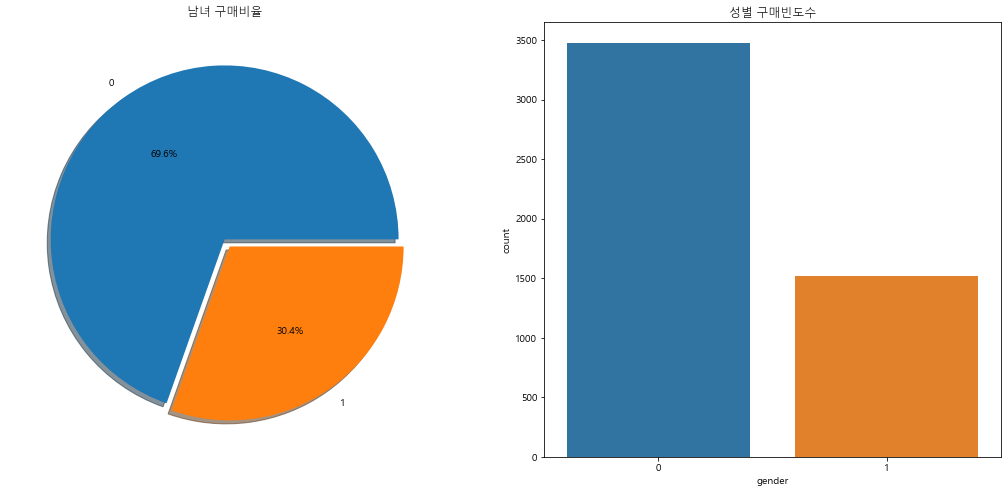

In [7]:
f, ax = plt.subplots(1,2,figsize=(18,8))

# 구매에 대한 남녀 빈도 체크
gender_freq = train_data.gender.value_counts()
gender_freq.plot.pie(explode=[0,0.05], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('남녀 구매비율', fontproperties=font_prop)
ax[0].set_ylabel('')

# 구매에 대한 남녀 빈도 체크 -> 히스토그램
sns.countplot('gender', data=train_data, ax=ax[1])
ax[1].set_title('성별 구매빈도수', fontproperties=font_prop)
plt.show()

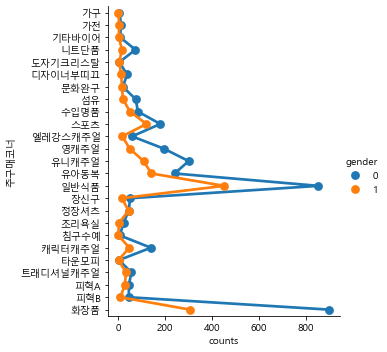

In [8]:
# 남녀별 주구매코너별 구매율
gender_catcnt = train_data.groupby(['gender', '주구매코너'])['custid'].agg('count').to_frame()
df_catecnt = gender_catcnt.reset_index()
df_catecnt.columns = ['gender', '주구매코너', 'counts']

sns.factorplot('counts', '주구매코너', hue='gender', data=df_catecnt)

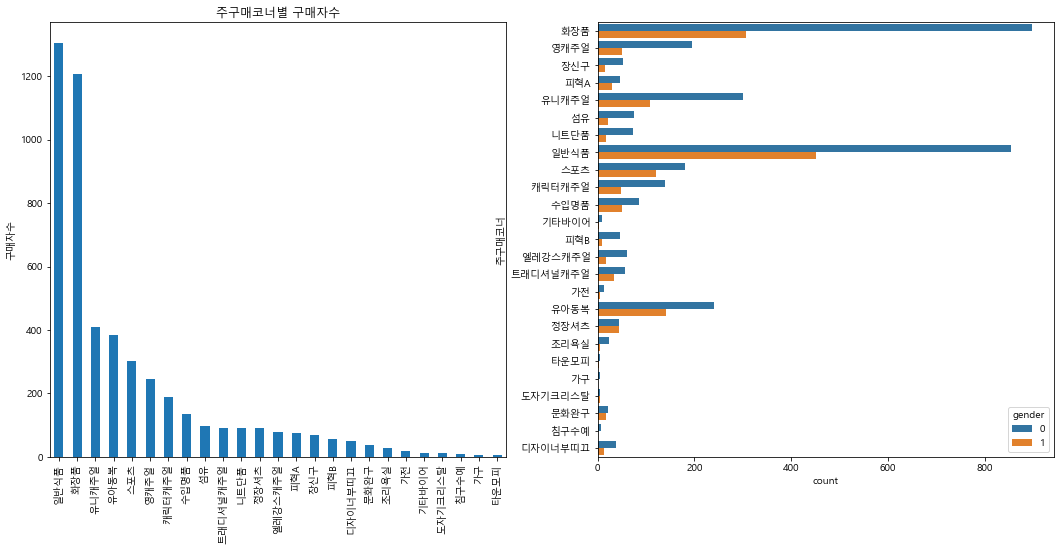

In [9]:
# 일반식품 -> 화장품 순으로 구매자수가 많음
# 여자는 화장품 -> 일반식풉 -> 유니캐주얼 순이고, 남자는 일반식품 -> 화장품 -> 유아동복 순으로 구매함.
f, ax = plt.subplots(1,2, figsize=(18,8))
train_data['주구매코너'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('주구매코너별 구매자수')
ax[0].set_ylabel('구매자수')
sns.countplot(y='주구매코너', hue='gender', data=train_data, ax=ax[1])
plt.show()

In [10]:
pd.crosstab(train_data['주구매코너'], train_data['gender'], margins=True).style.background_gradient(cmap='summer_r')

## Missing Values 처리 ##

In [11]:
# Missing Values 확인
trainData = train_data.copy() 
have_missing_value(trainData)

custid          0
gender          0
총구매액            0
구매건수            0
평균구매가격          0
평균할부개월수         0
구매브랜드종류         0
내점일수            0
수입상품_구매비율       0
주말방문비율          0
가을_구매건수       945
겨울_구매건수       897
봄_구매건수        689
여름_구매건수      1022
아침_구매건수      1442
저녁_구매건수       967
점심_구매건수       145
주구매코너           0
dtype: int64

In [12]:
# Feature 정의
# 수치형 Features
cont = ['총구매액','구매건수','평균구매가격','평균할부개월수','내점일수',
       '수입상품_구매비율','주말방문비율', '봄_구매건수', '여름_구매건수',
       '가을_구매건수','겨울_구매건수','아침_구매건수', '점심_구매건수',
       '저녁_구매건수', '구매브랜드종류']
# 범주형 Features
cate = ['주구매코너']
# 비분석 Features : drop
delCols = ['custid']
# target Feature
dfy = 'gender'

In [13]:
trainData

custid  gender     총구매액  구매건수  평균구매가격  평균할부개월수  구매브랜드종류  내점일수  \
0         18       0   680100    15   45340      1.7        9    10   
1         21       0   353450     9   39272      1.2        6     8   
2         23       0  5671400    36  157539      2.8       22    16   
3         26       0  1964000    28   70143      1.4       15    14   
4         35       0   885000     5  177000      6.0        5     2   
...      ...     ...      ...   ...     ...      ...      ...   ...   
4995   49952       1  6666517    93   71683      1.8       27    39   
4996   49954       0  3112100    17  183065      3.6       10    13   
4997   49957       1  5852482    37  158175      2.6       14    21   
4998   49975       1   654498    13   50346      2.5       10     7   
4999   49993       1  2554723    32   79835      1.7        9    26   

      수입상품_구매비율  주말방문비율  가을_구매건수  겨울_구매건수  봄_구매건수  여름_구매건수  아침_구매건수  저녁_구매건수  \
0          26.7   100.0      NaN      9.0     6.0      NaN      NaN      6.0   
1          11.1    37.5      NaN      5.0     4.0      NaN      3.0      NaN   
2           5.6    37.5      7.0     17.0    12.0      NaN     10.0     11.0   
3          39.3    28.6      5.0      8.0    15.0      NaN      NaN     18.0   
4           0.0   100.0      NaN      NaN     5.0      NaN      NaN      5.0   
...         ...     ...      ...      ...     ...      ...      ...      ...   
4995       10.8    43.6     13.0     33.0    14.0     33.0      8.0     41.0   
4996       29.4    38.5      4.0      6.0     6.0      1.0      3.0      NaN   
4997       40.5    19.0     12.0      6.0     6.0     13.0     16.0      NaN   
4998        7.7    14.3      6.0      4.0     2.0      1.0      NaN      2.0   
4999       21.9    34.6      6.0      5.0    10.0     11.0      8.0      5.0   

      점심_구매건수    주구매코너  
0         9.0      화장품  
1         6.0     영캐주얼  
2        15.0      장신구  
3        10.0      화장품  
4         NaN      피혁A  
...       ...      ...  
4995     44.0     일반식품  
4996     14.0  디자이너부띠끄  
4997     21.0      화장품  
4998     11.0      피혁A  
4999     19.0     일반식품  

[5000 rows x 18 columns]

In [14]:
# 대체값 0으로 수치형 Feature 결측치 처리 : 
Impute_missing_value_numeric(trainData, cont, 0)
have_missing_value(trainData)

custid       0
gender       0
총구매액         0
구매건수         0
평균구매가격       0
평균할부개월수      0
구매브랜드종류      0
내점일수         0
수입상품_구매비율    0
주말방문비율       0
가을_구매건수      0
겨울_구매건수      0
봄_구매건수       0
여름_구매건수      0
아침_구매건수      0
저녁_구매건수      0
점심_구매건수      0
주구매코너        0
dtype: int64

In [15]:
# 범주형 결측치 One-hot encoding 처리
dataP =Impute_missing_value_categorical(trainData, cate)

['주구매코너'].astype('category').cat.categories


In [16]:
# 학습용 데이터 확인
dataP.tail(3)

custid  gender     총구매액  구매건수  평균구매가격  평균할부개월수  구매브랜드종류  내점일수  \
4997   49957       1  5852482    37  158175      2.6       14    21   
4998   49975       1   654498    13   50346      2.5       10     7   
4999   49993       1  2554723    32   79835      1.7        9    26   

      수입상품_구매비율  주말방문비율  가을_구매건수  겨울_구매건수  봄_구매건수  여름_구매건수  아침_구매건수  저녁_구매건수  \
4997       40.5    19.0     12.0      6.0     6.0     13.0     16.0      0.0   
4998        7.7    14.3      6.0      4.0     2.0      1.0      0.0      2.0   
4999       21.9    34.6      6.0      5.0    10.0     11.0      8.0      5.0   

      점심_구매건수  주구매코너  
4997     21.0     24  
4998     11.0     22  
4999     19.0     14

 ## Modeling ##

In [17]:
# 데이터 분할(Split Data)
X_train, X_test, y_train, y_test = data_split_train_test(trainData, delCols, dfy, 0.25)
print(X_train.shape, X_test.shape)

(3750, 16) (1250, 16)


In [18]:
# decision tree 로 모델링
decisionTree_modeling(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.71      0.91      0.80       883
           1       0.31      0.10      0.15       367

    accuracy                           0.67      1250
   macro avg       0.51      0.50      0.47      1250
weighted avg       0.59      0.67      0.61      1250



In [19]:
# svm 으로 모델링
svm_modeling(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.71      0.99      0.83       883
           1       0.54      0.02      0.04       367

    accuracy                           0.71      1250
   macro avg       0.62      0.51      0.43      1250
weighted avg       0.66      0.71      0.60      1250



In [20]:
# neural network 모델 적용
neural_network_modeling(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.71      1.00      0.83       883
           1       0.00      0.00      0.00       367

    accuracy                           0.71      1250
   macro avg       0.35      0.50      0.41      1250
weighted avg       0.50      0.71      0.58      1250



- dataP.gender.value_counts()  # <font color='red'>비대칭 데이터</font> 확인
 - 0    3479
 - 1    1521
 - Name: gender, dtype: int64
 
#### DecisionTree, SVM, neural network 알고리즘으로 모델링한 결과,
- 남성의 데이터가 적어서 재현율이 현격히 낮은 현상이 나타남.

In [21]:
trainData.gender.value_counts()

0    3479
1    1521
Name: gender, dtype: int64

- 비대칭 데이터는 데이터 비율을 맞추면 정밀도(precision)가 향상된다.
 - 오버샘플링(Over-Sampling)  : 소수 클래스 데이터를 추가함.
 - 언더샘플링(Under-Sampling) : 다수 클래스 데이터에서 일부만 사용함.
 - 복합샘플링(Combining Over-and Under-Sampling)
 
- pip install -U imbalanced-learn


### <font color = "#CC3D3D">Tomek links<font>: a under-sampling class method 
- Under-Sampling 기법은 precision/recall/f1-score 개선이 미미함...

In [22]:
under_Sampling_DecisionTree(X_train, y_train)

              precision    recall  f1-score   support

           0       0.70      0.83      0.76       883
           1       0.28      0.16      0.20       367

    accuracy                           0.63      1250
   macro avg       0.49      0.49      0.48      1250
weighted avg       0.58      0.63      0.60      1250



### <font color = "#CC3D3D">SMOTE + Tomek</font>
- precision/recall/f1-score 모두 <font color="blue">개선</font>됨 => 따라서, Hybrid 샘플링을 하기로 결정함.

In [23]:
combining_Sampling_DecisionTree(X_train, y_train)

              precision    recall  f1-score   support

           0       0.74      0.56      0.63       883
           1       0.33      0.52      0.40       367

    accuracy                           0.55      1250
   macro avg       0.53      0.54      0.52      1250
weighted avg       0.62      0.55      0.57      1250



## Features engineering ##

In [24]:
# 학습용 데이터에 '코너별구매건' 컬럼 추가
dt0 = dataP.groupby(['주구매코너'])['구매건수'].agg(sum)   
# to_frame() : Series를 DataFrame으로 간단하게 변환
# set_index : 기존의 행 인덱스를 제거하고 데이터 열 중 하나를 인덱스로 설정
# reset_index : 기존의 행 인덱스를 제거하고 인덱스를 마지막 데이터 열로 추가
df0 = dt0.to_frame().reset_index() 
df0.columns = ['주구매코너', '코너별구매건']
#df0.head(3)
# merge 명령은 두 데이터 프레임의 공통 열 혹은 인덱스를 기준으로 두 개의 테이블을 합친다. 
# 이 때 기준이 되는 열, 행의 데이터를 키(key)라고 한다.
dataP_ = pd.merge(dataP, df0, on='주구매코너')
# dataP_.head()
print(dataP_[(dataP_['주구매코너']==1)].groupby(['gender'])['총구매액'].agg(sum))
print(dataP_[(dataP_['주구매코너']==1)].groupby(['gender'])['구매건수'].agg(sum))
dataP_.head(2)

gender
0    31111117
1    29039091
Name: 총구매액, dtype: int64
gender
0    214
1    101
Name: 구매건수, dtype: int64


custid  gender     총구매액  구매건수  평균구매가격  평균할부개월수  구매브랜드종류  내점일수  수입상품_구매비율  \
0      18       0   680100    15   45340      1.7        9    10       26.7   
1      26       0  1964000    28   70143      1.4       15    14       39.3   

   주말방문비율  가을_구매건수  겨울_구매건수  봄_구매건수  여름_구매건수  아침_구매건수  저녁_구매건수  점심_구매건수  \
0   100.0      0.0      9.0     6.0      0.0      0.0      6.0      9.0   
1    28.6      5.0      8.0    15.0      0.0      0.0     18.0     10.0   

   주구매코너  코너별구매건  
0     24   25740  
1     24   25740

In [25]:
# 건수 Feature들을 최소단위 정보인 구매건당 구매액로 변경
def createFeatures(df_p):
    df_p['아침구매액'] = np.round(df_p['총구매액']*(df_p['아침_구매건수'] /df_p['구매건수'] ), 3)
    df_p['점심구매액'] = np.round(df_p['총구매액']*(df_p['점심_구매건수'] /df_p['구매건수'] ), 3)
    df_p['저녁구매액'] = np.round(df_p['총구매액']*(df_p['저녁_구매건수'] /df_p['구매건수'] ), 3)  
    df_p['봄구매액']   = np.round(df_p['총구매액']*(df_p['봄_구매건수'] /df_p['구매건수'] ), 3) 
    df_p['여름구매액'] = np.round(df_p['총구매액']*(df_p['여름_구매건수'] /df_p['구매건수'] ), 3) 
    df_p['가을구매액'] = np.round(df_p['총구매액']*(df_p['가을_구매건수'] /df_p['구매건수'] ), 3)  
    df_p['겨울구매액'] = np.round(df_p['총구매액']*(df_p['겨울_구매건수'] /df_p['구매건수'] ), 3)  
    df_p['내점구매율'] = np.round(df_p['구매건수'] /df_p['내점일수'], 3)

def dropFeatures(df_p):
    drop_cols = ['아침_구매건수', '점심_구매건수', '저녁_구매건수', '총구매액', '구매건수',
         '봄_구매건수', '여름_구매건수', '가을_구매건수', '겨울_구매건수', '내점일수'] 
    
    return df_p.drop(drop_cols, axis=1)

createFeatures(dataP_)
dataPP = dropFeatures(dataP_) 
dataPP[(dataPP['주구매코너']==2)].head(3)

custid  gender  평균구매가격  평균할부개월수  구매브랜드종류  수입상품_구매비율  주말방문비율  주구매코너  \
4123     363       0   90960      3.0        4       20.0    25.0      2   
4124    4822       0  248049      2.3       10       10.5    33.3      2   
4125   11617       1  124767      3.8        8       25.0    62.5      2   

      코너별구매건       아침구매액        점심구매액       저녁구매액        봄구매액       여름구매액  \
4123     149       0.000    90960.000  363840.000  454800.000       0.000   
4124     149  992196.632  3224639.053  496098.316  744147.474  992196.632   
4125     149  124766.667   499066.667  873366.667  249533.333  499066.667   

            가을구매액        겨울구매액  내점구매율  
4123        0.000        0.000  1.250  
4124  1736344.105  1240245.789  1.583  
4125   748600.000        0.000  1.500

In [26]:
sns.heatmap(dataPP.corr(), annot=True)

<AxesSubplot:>

In [27]:
# 학습용 데이터 확정

dataPT = dataPP.copy()
dataPD = dataPT.drop(['주말방문비율', '저녁구매액', '평균할부개월수','수입상품_구매비율','주구매코너'], axis=1)

dfy = dataPD['gender']
dfX = dataPD.drop('gender', axis=1)
dfX.tail(2)

custid  평균구매가격  구매브랜드종류  코너별구매건         아침구매액         점심구매액  \
4998   49732  314259       23    2219  1.477015e+07  3.928233e+07   
4999   49954  183065       10    2219  5.491941e+05  2.562906e+06   

             봄구매액         여름구매액         가을구매액         겨울구매액  내점구매율  
4998  8484982.398  2.388365e+07  1.445590e+07  1.319886e+07  2.449  
4999  1098388.235  1.830647e+05  7.322588e+05  1.098388e+06  1.308

In [28]:
dfX.shape

(5000, 11)

In [29]:
from imblearn.combine import *

# PCA로 feature 2개만 선택하여 Scatter로 시각화해 봄..
pca = PCA(n_components=2)
X_org = pca.fit_transform(dfX)
y_org = np.array(dfy)
X_resampled, y_resampled = SMOTETomek(random_state=0).fit_sample(dfX, dfy)
X_pca = pca.transform(X_resampled)

scaler = StandardScaler()
X_org_scaled = scaler.fit_transform(X_org)
X_pca_scaled = scaler.transform(X_pca)

title1 = 'Original set('+ str(X_org_scaled.shape) +')'
title2 = 'SMOTE + Tomek('+ str(X_pca_scaled.shape) +')'
xlim = [-1, 10]
ylim = [-8, 18]
xticks = range(-1, 10)
yticks = range(-8, 18)

# Scatter 그래프 그리기
drawSMOTETomek(X_org_scaled, y_org, X_pca_scaled, y_resampled, title1, title2, xlim, ylim, xticks, yticks)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=0)
print(dfX.shape, X_resampled.shape, X_train.shape, X_test.shape)

(5000, 11) (6660, 11) (4995, 11) (1665, 11)


- <font color="red">SMOTETomek</font> 비대칭 데이터 OverSampling 처리
 - Scatter 그래프로 시각화하여 비교하기 위해 PCA와 StandardScaler를 사용함.
 - 실제 학습용으로는 SMOTETomek로 샘플링한 X_resampled, y_resampled를 사용함.

In [30]:
# scoring="roc_auc|f1" => 0.496
temp_param1 = bestModel('SVC', 5, 'GRID', X_train, y_train, 'minmax', True, False, 'f1', -1, 10, 5)
best_param1 = {key.split("__")[1]:value for key, value in temp_param1.items() if key != 'polynomialfeatures__degree'}
svm1 = SVC(**best_param1)
score_svm1 = svm1.fit(X_train, y_train).score(X_test, y_test)
print("score_svm1 ::: {}".format(score_svm1))
print("-----------------------------------")
y_svm1 = svm1.predict(X_test)
print(classification_report(y_test, y_svm1))

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.7min finished


score_svm1 ::: 0.4978978978978979
-----------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       836
           1       0.50      1.00      0.66       829

    accuracy                           0.50      1665
   macro avg       0.25      0.50      0.33      1665
weighted avg       0.25      0.50      0.33      1665



- RandomizedSearchCV LGBM
 - StratifiedShuffleSplit + RandomizedSearchCV
 - precision/recall/f1-score이 <font color="blue">균형(최고=0.755)</font> 상태로 개선됨.
 - <font color="green"><b>def</b></font> bestGBDTNextModel(model, isKfold, nfold, searchCV, Xtrain, ytrain, Xtest, ytest, nIter, scoring, errScore, verbose, nJobs)
 - 카테고리 Feature이 '주구매코너'를 삭제하여 LGBM.categorical_feature 속성은 무시함.

In [31]:
# scoring="roc_auc|f1" => 0.755
# categories_indices = [X_train.columns.get_loc(col) for col in ['주구매코너']]
best_param1 = bestGBDTNextModel('LGBM', False, 5, 'RANDOM', X_train, y_train, X_test, y_test, 15, 'roc_auc', 0, 3, -1)
lgbm1 = LGBMClassifier(**best_param1)
score_lgbm1 = lgbm1.fit(X_train, y_train).score(X_test, y_test)
print("score_lgbm1 ::: {}".format(score_lgbm1))
print("-----------------------------------")
y_lgbm1 = lgbm1.predict(X_test)
print(classification_report(y_test, y_lgbm1))

# 최고=0.755 Score LGBM best_estimator
#  LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
#         importance_type='split', lambda_l1=0.01, lambda_l2=0,
#         learning_rate=0.01, max_depth=50, metric='auc',
#         min_child_samples=20, min_child_weight=0.001, min_data_in_leaf=20,
#         min_split_gain=0.0, n_estimators=300, n_jobs=-1,
#         num_boost_round=4000, num_leaves=150, objective='binary',
#         random_state=0, reg_alpha=0.1, reg_lambda=0.0, silent=True,
#         subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   39.5s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  4.3min finished


LGBM grid_.best_score 0.848
LGBM grid_.best_score 0.869
LGBM best_estimator LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', lambda_l1=0.01, lambda_l2=0.01,
               learning_rate=0.05, max_depth=100, metric='auc',
               min_child_samples=20, min_child_weight=0.001,
               min_data_in_leaf=20, min_split_gain=0.0, n_estimators=400,
               n_jobs=-1, num_boost_round=5000, num_leaves=200,
               objective='binary', random_state=0, reg_alpha=0.1,
               reg_lambda=0.1, silent=True, subsample=1,
               subsample_for_bin=200000, subsample_freq=0)
score_lgbm1 ::: 0.7801801801801802
-----------------------------------
              precision    recall  f1-score   support

           0       0.78      0.79      0.78       836
           1       0.79      0.77      0.78       829

    accuracy                           0.78      1665
   macro avg       0.78      0.78      0

## 전개(Deployment) ##

In [32]:
# 1. 예측용 데이터를 로드한다.
news = pd.read_csv('./data/test.csv', encoding='CP949')
newsP = news.copy()
newsP.head(2)

custid     총구매액  구매건수  평균구매가격  평균할부개월수  구매브랜드종류  내점일수  수입상품_구매비율  주말방문비율  \
0  100001  3439000    25  137560      2.2       19    16       12.0    31.2   
1  100002  2073090    39   53156      1.3       18    29        0.0    20.7   

   가을_구매건수  겨울_구매건수  봄_구매건수  여름_구매건수  아침_구매건수  저녁_구매건수  점심_구매건수 주구매코너  
0      5.0      4.0     7.0      9.0     13.0      1.0     11.0   장신구  
1     13.0      8.0    10.0      8.0      4.0     10.0     25.0  유아동복

In [33]:
have_missing_value(newsP)

custid          0
총구매액            0
구매건수            0
평균구매가격          0
평균할부개월수         0
구매브랜드종류         0
내점일수            0
수입상품_구매비율       0
주말방문비율          0
가을_구매건수       948
겨울_구매건수       911
봄_구매건수        681
여름_구매건수       991
아침_구매건수      1392
저녁_구매건수      1025
점심_구매건수       139
주구매코너           0
dtype: int64

In [34]:
# 2. 예측용 데이터 결측치 처리 및 비분석 컬럼 삭제 
newsP.fillna(value=0, inplace=True)

for col in newsP[cate].dtypes.index:
    print("newsP['"+ col +"'].astype('category').cat.categories")
    newsP[col].astype('category').cat.categories

newsP[cate] = newsP[cate].apply(lambda x: x.astype('category').cat.codes)
newsP.tail(3)

newsP['주구매코너'].astype('category').cat.categories


custid     총구매액  구매건수  평균구매가격  평균할부개월수  구매브랜드종류  내점일수  수입상품_구매비율  \
4997  104998   960923    12   80077      1.8        7     7        0.0   
4998  104999   786600    14   56186      1.7       12     9       14.3   
4999  105000  2568073    76   33790      1.6       23    35       10.5   

      주말방문비율  가을_구매건수  겨울_구매건수  봄_구매건수  여름_구매건수  아침_구매건수  저녁_구매건수  점심_구매건수  \
4997    42.9      4.0      1.0     6.0      1.0      0.0      0.0     12.0   
4998    55.6      0.0      7.0     4.0      3.0      2.0      4.0      8.0   
4999    22.9     23.0     20.0     9.0     24.0     11.0      4.0     61.0   

      주구매코너  
4997     14  
4998     24  
4999     14

In [35]:
# 3. 예측용 데이터에 '코너별구매건' 컬럼 추가
nd0 = newsP.groupby(['주구매코너'])['구매건수'].agg(sum)   
nd0 = nd0.to_frame().reset_index()
nd0.columns = ['주구매코너', '코너별구매건']
# nd0.head(3)
newsP_ = pd.merge(newsP, nd0, on='주구매코너')
# newsP_.head(2)

# 4. 예측용 데이터의 건수 Feature들을 최소단위 정보인 구매건당 구매액로 변경한다.
createFeatures(newsP_)
newsPP = dropFeatures(newsP_) # 파생 Feature -> 유도 Feature들 삭제
# newsPP[(newsPP['주구매코너']==2)].head(3)

# 5. 머신러닝 예측용 데이터 변환 완료
X_pred = newsPP.drop(['주말방문비율', '저녁구매액', '평균할부개월수','수입상품_구매비율','주구매코너'], axis=1)
X_pred.tail(2)

custid  평균구매가격  구매브랜드종류  코너별구매건     아침구매액      점심구매액      봄구매액  \
4998  104474  107060       15     319  107060.0  1284720.0  428240.0   
4999  104752   63625        8     319       0.0   381750.0  254500.0   

         여름구매액     가을구매액     겨울구매액  내점구매율  
4998  321180.0  749420.0  107060.0    1.5  
4999  254500.0       0.0       0.0    2.0

### Best Model training ###

In [36]:
best_model1 = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
         importance_type='split', lambda_l1=0.01, lambda_l2=0,
         learning_rate=0.01, max_depth=50, metric='auc',
         min_child_samples=20, min_child_weight=0.001, min_data_in_leaf=20,
         min_split_gain=0.0, n_estimators=300, n_jobs=-1,
         num_boost_round=4000, num_leaves=150, objective='binary',
         random_state=0, reg_alpha=0.1, reg_lambda=0.0, silent=True,
         subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

score_best1 = best_model1.fit(X_train, y_train).score(X_test, y_test)
y_best1 = best_model1.predict(X_test)

print("best_model1 -----------------------------{}".format(score_best1))
print(classification_report(y_test, y_best1))

best_model1 -----------------------------0.7753753753753754
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       836
           1       0.78      0.76      0.77       829

    accuracy                           0.78      1665
   macro avg       0.78      0.78      0.78      1665
weighted avg       0.78      0.78      0.78      1665



In [37]:
best_model2 = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
        colsample_bytree=1, gamma=0, learning_rate=0.07, max_delta_step=0,
        max_depth=7, min_child_weight=1, missing=None, n_estimators=700,
        n_jobs=1, nthread=3, objective='binary:logistic', random_state=0,
        reg_alpha=0.01, reg_lambda=0.1, scale_pos_weight=1, seed=None,
        silent=True, subsample=1)

score_best2 = best_model2.fit(X_train, y_train).score(X_test, y_test)
y_best2 = best_model2.predict(X_test)

print("best_model2 -----------------------------{}".format(score_best2))
print(classification_report(y_test, y_best2))

[11:51:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:51:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
best_model2 -----------------------------0.7663663663663663
              precision    recall  f1-score   support

           0       0.75      0.80      0.77       836
           1       0.78      0.74      0.76       829

    accuracy                           0.77      1665
   macro avg       0.77     

#### SMOTETomek로 재샘플링한 데이터가 narray 형식이므로 예측용 데이터도 narray로 변환하여 예측한다.

In [38]:
new_D = X_pred.copy()
new_T = dataPT.drop(['주말방문비율', '저녁구매액', '평균할부개월수','수입상품_구매비율','주구매코너'], axis=1)
new_T = new_T.drop('gender', axis=1)
new_T.tail(2)

custid  평균구매가격  구매브랜드종류  코너별구매건         아침구매액         점심구매액  \
4998   49732  314259       23    2219  1.477015e+07  3.928233e+07   
4999   49954  183065       10    2219  5.491941e+05  2.562906e+06   

             봄구매액         여름구매액         가을구매액         겨울구매액  내점구매율  
4998  8484982.398  2.388365e+07  1.445590e+07  1.319886e+07  2.449  
4999  1098388.235  1.830647e+05  7.322588e+05  1.098388e+06  1.308

In [39]:
display(dfX.shape, new_T.shape)

(5000, 11)

(5000, 11)

In [40]:
new_D['pred']       = best_model1.predict(new_T)
new_D['pred_prob']  = best_model1.predict_proba(new_T)[:,1]

In [41]:
news.sort_values(by=['custid']).tail(3)

custid     총구매액  구매건수  평균구매가격  평균할부개월수  구매브랜드종류  내점일수  수입상품_구매비율  \
4997  104998   960923    12   80077      1.8        7     7        0.0   
4998  104999   786600    14   56186      1.7       12     9       14.3   
4999  105000  2568073    76   33790      1.6       23    35       10.5   

      주말방문비율  가을_구매건수  겨울_구매건수  봄_구매건수  여름_구매건수  아침_구매건수  저녁_구매건수  점심_구매건수  \
4997    42.9      4.0      1.0     6.0      1.0      NaN      NaN     12.0   
4998    55.6      NaN      7.0     4.0      3.0      2.0      4.0      8.0   
4999    22.9     23.0     20.0     9.0     24.0     11.0      4.0     61.0   

     주구매코너  
4997  일반식품  
4998   화장품  
4999  일반식품

In [42]:
new_D.sort_values(by=['custid']).tail(3)

custid  평균구매가격  구매브랜드종류  코너별구매건       아침구매액        점심구매액        봄구매액  \
2423  104998   80077        7   74942       0.000   960923.000  480461.500   
3743  104999   56186       12   26123  112371.429   449485.714  224742.857   
2424  105000   33790       23   74942  371694.776  2061216.487  304113.908   

           여름구매액       가을구매액       겨울구매액  내점구매율  pred  pred_prob  
2423   80076.917  320307.667   80076.917  1.714     1   0.998925  
3743  168557.143       0.000  393300.000  1.556     1   0.998804  
2424  810970.421  777179.987  675808.684  2.171     0   0.003793

In [43]:
dfN = new_D[['custid', 'pred', 'pred_prob']]
#dfN
targets = pd.merge(news, dfN, on='custid')
targets.tail(5)

custid     총구매액  구매건수  평균구매가격  평균할부개월수  구매브랜드종류  내점일수  수입상품_구매비율  \
4995  104996   670690     5  134138      1.4        5     4        0.0   
4996  104997   628700    13   48362      1.8       10     7        7.7   
4997  104998   960923    12   80077      1.8        7     7        0.0   
4998  104999   786600    14   56186      1.7       12     9       14.3   
4999  105000  2568073    76   33790      1.6       23    35       10.5   

      주말방문비율  가을_구매건수  겨울_구매건수  봄_구매건수  여름_구매건수  아침_구매건수  저녁_구매건수  점심_구매건수  \
4995    75.0      1.0      2.0     2.0      NaN      1.0      1.0      3.0   
4996    42.9      NaN      5.0     1.0      7.0      NaN      3.0     10.0   
4997    42.9      4.0      1.0     6.0      1.0      NaN      NaN     12.0   
4998    55.6      NaN      7.0     4.0      3.0      2.0      4.0      8.0   
4999    22.9     23.0     20.0     9.0     24.0     11.0      4.0     61.0   

     주구매코너  pred  pred_prob  
4995  일반식품     0   0.001569  
4996  조리욕실     0   0.000695  
4997  일반식품     1   0.998925  
4998   화장품     1   0.998804  
4999  일반식품     0   0.003793

In [44]:
f, ax = plt.subplots(1,2,figsize=(18,8))

# 구매에 대한 남녀 빈도 체크
gender_freq = targets.pred.value_counts()
gender_freq.plot.pie(explode=[0,0.05], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('남녀 구매비율', fontproperties=font_prop)
ax[0].set_ylabel('')

# 구매에 대한 남녀 빈도 체크 -> 히스토그램
sns.countplot('pred', data=targets, ax=ax[1])
ax[1].set_title('성별 구매빈도수', fontproperties=font_prop)
plt.show()

In [45]:
# 예측한 Data를 파일로 저장하여 제출한다.
targets.sort_values(by="custid", ascending=False).to_csv("ML_exam-sub.csv", index=False)
pd.read_csv("ML_exam-sub.csv").count()

custid       5000
총구매액         5000
구매건수         5000
평균구매가격       5000
평균할부개월수      5000
구매브랜드종류      5000
내점일수         5000
수입상품_구매비율    5000
주말방문비율       5000
가을_구매건수      4052
겨울_구매건수      4089
봄_구매건수       4319
여름_구매건수      4009
아침_구매건수      3608
저녁_구매건수      3975
점심_구매건수      4861
주구매코너        5000
pred         5000
pred_prob    5000
dtype: int64

In [46]:
result_data = pd.read_csv('ML_exam-sub.csv')
result_data

custid     총구매액  구매건수  평균구매가격  평균할부개월수  구매브랜드종류  내점일수  수입상품_구매비율  \
0     105000  2568073    76   33790      1.6       23    35       10.5   
1     104999   786600    14   56186      1.7       12     9       14.3   
2     104998   960923    12   80077      1.8        7     7        0.0   
3     104997   628700    13   48362      1.8       10     7        7.7   
4     104996   670690     5  134138      1.4        5     4        0.0   
...      ...      ...   ...     ...      ...      ...   ...        ...   
4995  100005  1297640    26   49909      2.3       13     9       11.5   
4996  100004  6696522    46  145577      1.7       31    22       37.0   
4997  100003  1303800    22   59264      1.8       14    12        0.0   
4998  100002  2073090    39   53156      1.3       18    29        0.0   
4999  100001  3439000    25  137560      2.2       19    16       12.0   

      주말방문비율  가을_구매건수  겨울_구매건수  봄_구매건수  여름_구매건수  아침_구매건수  저녁_구매건수  점심_구매건수  \
0       22.9     23.0     20.0     9.0     24.0     11.0      4.0     61.0   
1       55.6      NaN      7.0     4.0      3.0      2.0      4.0      8.0   
2       42.9      4.0      1.0     6.0      1.0      NaN      NaN     12.0   
3       42.9      NaN      5.0     1.0      7.0      NaN      3.0     10.0   
4       75.0      1.0      2.0     2.0      NaN      1.0      1.0      3.0   
...      ...      ...      ...     ...      ...      ...      ...      ...   
4995    22.2     18.0      NaN     5.0      3.0      NaN      NaN     26.0   
4996    50.0      5.0     15.0     9.0     17.0      NaN      4.0     42.0   
4997    41.7      6.0      7.0     3.0      6.0      3.0      1.0     18.0   
4998    20.7     13.0      8.0    10.0      8.0      4.0     10.0     25.0   
4999    31.2      5.0      4.0     7.0      9.0     13.0      1.0     11.0   

     주구매코너  pred  pred_prob  
0     일반식품     0   0.003793  
1      화장품     1   0.998804  
2     일반식품     1   0.998925  
3     조리욕실     0   0.000695  
4     일반식품     0   0.001569  
...    ...   ...        ...  
4995   스포츠     1   0.999203  
4996  수입명품     1   0.998544  
4997  유아동복     0   0.000086  
4998  유아동복     0   0.000022  
4999   장신구     0   0.000002  

[5000 rows x 19 columns]

In [47]:
gender_freq = result_data.pred.value_counts()
gender_freq

0    3527
1    1473
Name: pred, dtype: int64